In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/udemy-courses/udemy_courses.csv


In [14]:
import matplotlib.pyplot as plt 

In [15]:
df = pd.read_csv('/kaggle/input/udemy-courses/udemy_courses.csv')

In [17]:
import seaborn as sb

Initial glance on dataset

In [18]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [19]:
df.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
545,180372,Mortgage Backed Securities,https://www.udemy.com/mortgage-backed-securities/,True,50,376,29,21,All Levels,3.500000,2014-03-13T12:47:09Z,Business Finance
980,94532,Beginner Financial Analysis: Invest Like Warre...,https://www.udemy.com/beginner-financial-analy...,True,50,83,4,19,Beginner Level,0.683333,2014-03-10T21:49:34Z,Business Finance
1566,1077836,Ecover Mastery in 30 Minutes with NO photoshop...,https://www.udemy.com/ecover-mastery-in-30-min...,True,20,1,0,10,Beginner Level,0.633333,2017-01-23T21:55:40Z,Graphic Design
3233,446134,Ultimate Web Designer & Developer Course: Buil...,https://www.udemy.com/web-developer-course/,True,200,33788,4434,246,All Levels,32.500000,2015-08-20T20:55:19Z,Web Development
2894,565282,Learn To Create Different Website Layouts & Me...,https://www.udemy.com/websitelayouts/,True,195,6510,45,22,All Levels,2.000000,2015-08-11T22:26:38Z,Web Development


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [21]:
df.shape

(3678, 12)

In [22]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 3678
Number of columns: 12


Data Cleaning process

In [23]:
df.isnull().sum(0)

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<AxesSubplot:>

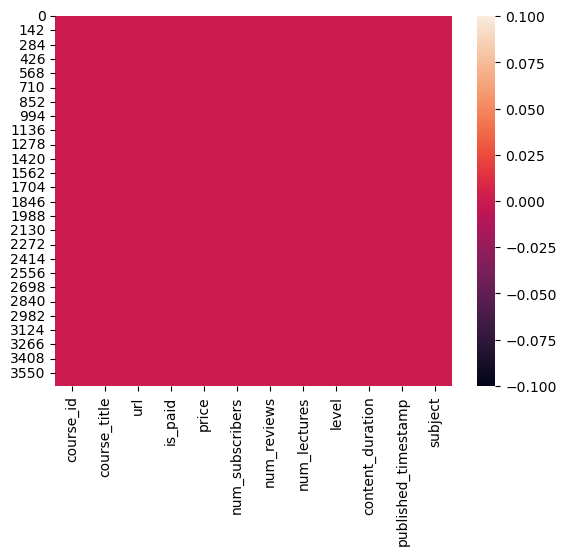

In [24]:
sb.heatmap(df.isnull())

In [25]:
df[df.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


In [26]:
df=df.drop_duplicates()

In [27]:
df[df.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject


Total number of provided courses based on subject

In [28]:
df.groupby('subject')['course_title'].count()

subject
Business Finance       1191
Graphic Design          602
Musical Instruments     680
Web Development        1199
Name: course_title, dtype: int64

In [29]:
df['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

In [30]:
df['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

Text(0, 0.5, 'number of courses per proviced subject')

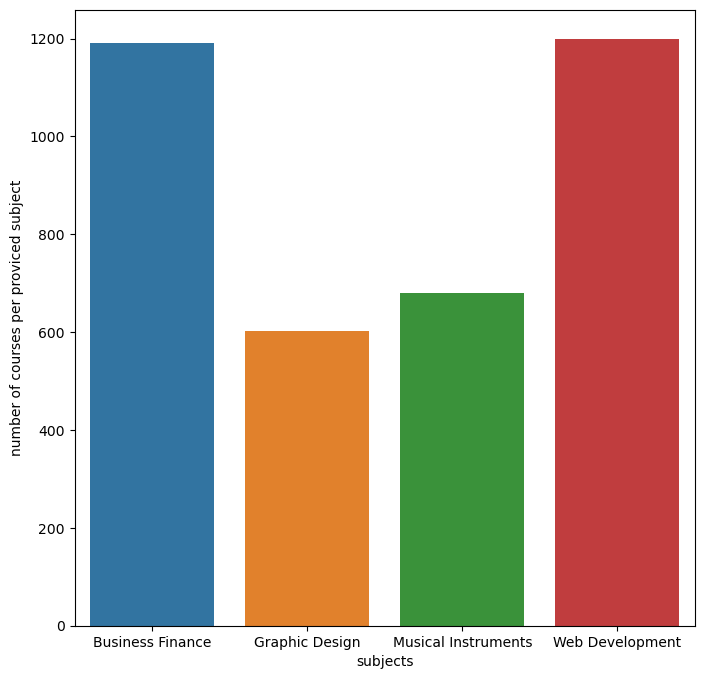

In [31]:
plt.figure(figsize=(8,8))
sb.countplot(x='subject', data=df)
plt.xlabel('subjects')
plt.ylabel('number of courses per proviced subject')

Number of provided courses based on difficulty level

Text(0, 0.5, 'Number of courses based on difficulty level')

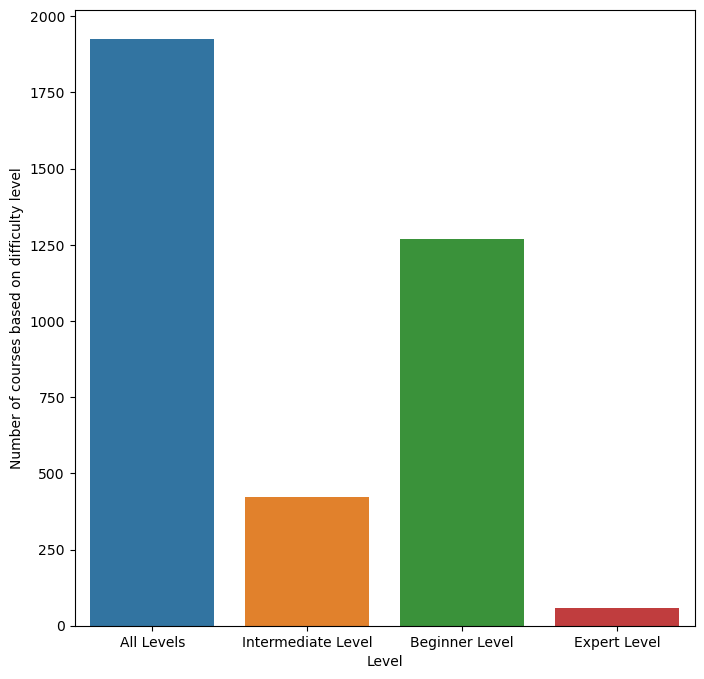

In [32]:
plt.figure(figsize=(8,8))
sb.countplot(x='level', data=df)
plt.xlabel('Level')
plt.ylabel('Number of courses based on difficulty level')

In [33]:
df['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

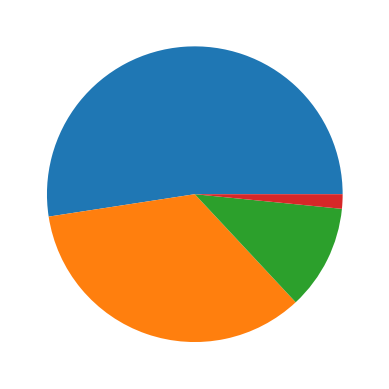

In [34]:
slices=df['level'].value_counts()

plt.pie(slices)
plt.show()

In [35]:
df['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

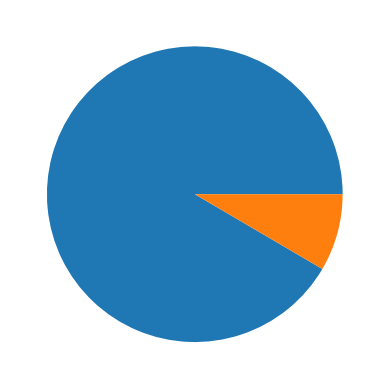

In [36]:
slices1=df['is_paid'].value_counts()

plt.pie(slices1)
plt.show()

Courses in blue that shown above are paid courses

<AxesSubplot:xlabel='level', ylabel='num_lectures'>

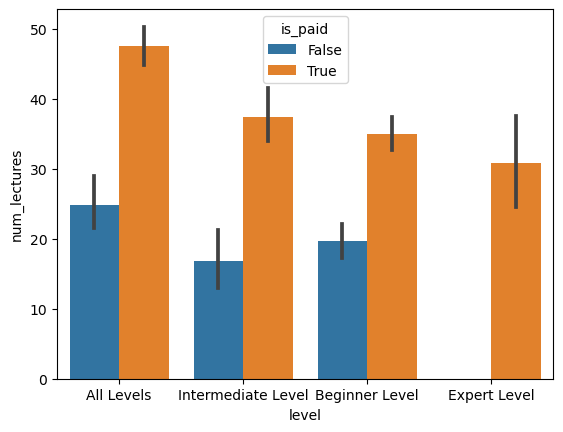

In [37]:
sb.barplot(y='num_lectures', x='level' ,data=df,hue='is_paid')

Amount of paid courses vs free courses

<AxesSubplot:xlabel='is_paid', ylabel='num_lectures'>

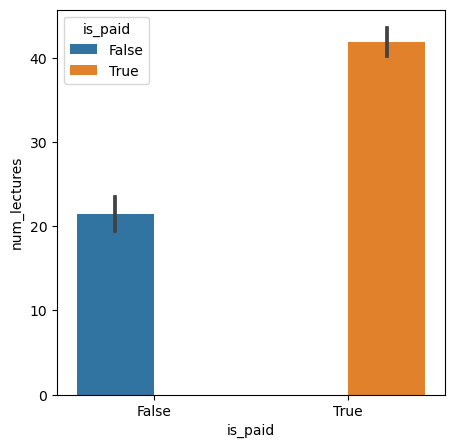

In [38]:
plt.figure(figsize=(5,5))
sb.barplot(y='num_lectures', x='is_paid',data=df,hue='is_paid')

<AxesSubplot:xlabel='is_paid', ylabel='num_subscribers'>

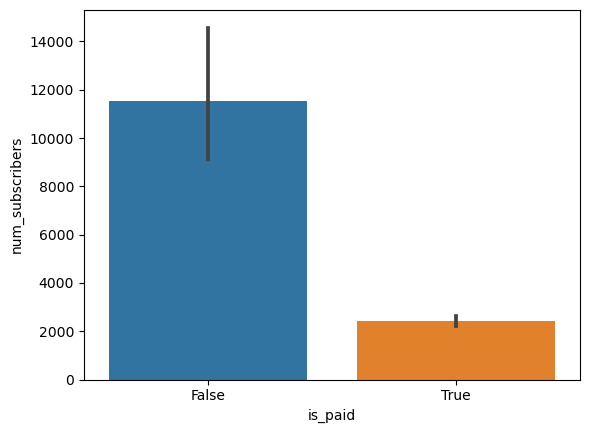

In [39]:
sb.barplot(x='is_paid',y='num_subscribers',data=df)

Most popular course

In [40]:
df[df['num_subscribers'].max() == df['num_subscribers']]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

In [41]:
top10 = df.sort_values(by='num_subscribers',ascending =False).head(10)

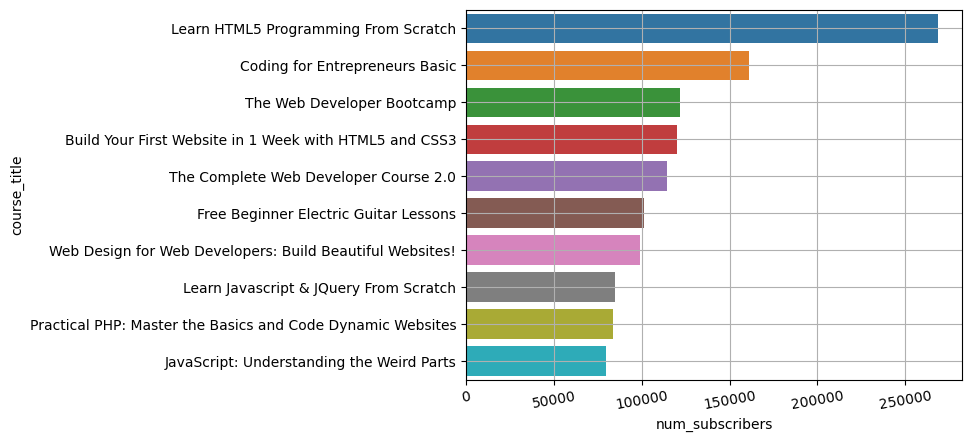

In [42]:
sb.barplot(y='course_title',x='num_subscribers',data=top10)
plt.xticks(rotation=10)
plt.grid('True')

Courses with the higher number of reviews

In [43]:
df.sort_values(by='num_reviews',ascending=False).head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development
3204,756150,Angular 4 (formerly Angular 2) - The Complete ...,https://www.udemy.com/the-complete-guide-to-an...,True,190,73783,19649,329,All Levels,22.0,2016-02-11T07:29:29Z,Web Development
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12T23:19:54Z,Web Development
3254,705264,Modern React with Redux,https://www.udemy.com/react-redux/,True,180,50815,15117,150,All Levels,26.5,2015-12-28T19:20:21Z,Web Development


(array([3.645e+03, 1.100e+01, 7.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2744.5,  5489. ,  8233.5, 10978. , 13722.5, 16467. ,
        19211.5, 21956. , 24700.5, 27445. ]),
 <BarContainer object of 10 artists>)

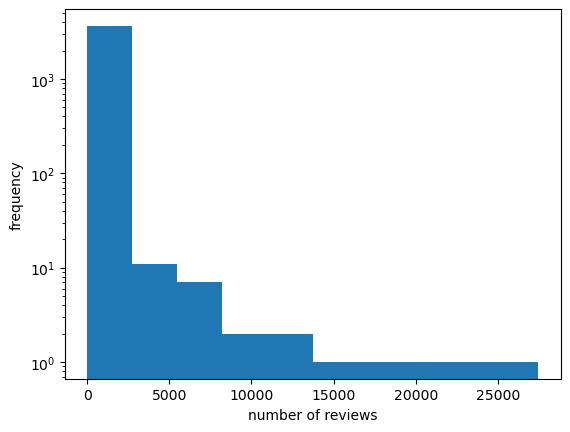

In [44]:
plt.xlabel('number of reviews')
plt.ylabel('frequency')

plt.hist(df['num_reviews'],log=True)

<AxesSubplot:xlabel='subject', ylabel='num_reviews'>

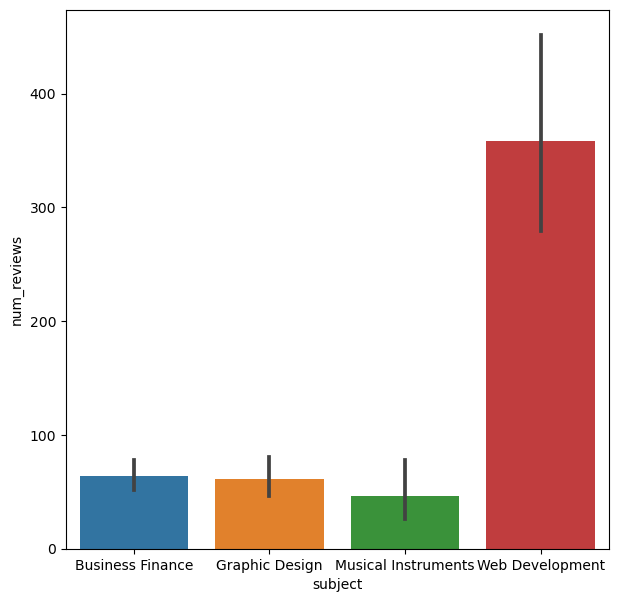

In [45]:
plt.figure(figsize=(7,7))
sb.barplot(x='subject', y='num_reviews', data=df)

Number of reviews compare to price

<AxesSubplot:xlabel='num_reviews', ylabel='price'>

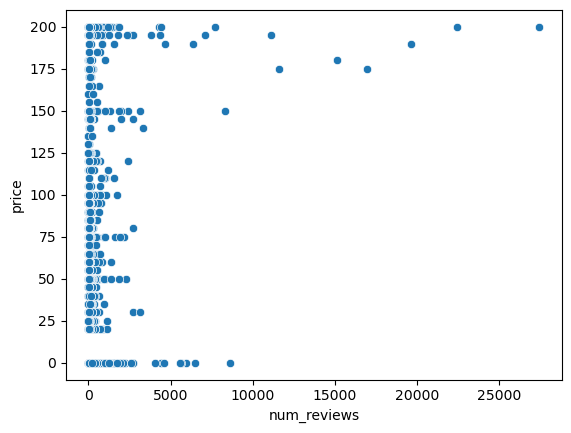

In [46]:
sb.scatterplot(x='num_reviews', y='price', data=df)

Course prices based on subject

<AxesSubplot:xlabel='price', ylabel='subject'>

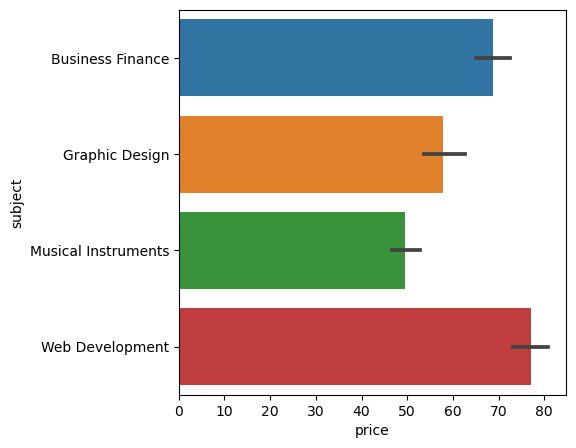

In [47]:
plt.figure(figsize=(5,5))
sb.barplot(x='price',y='subject',data=df)